# Analyse des données
Cette deuxième partie explore les données qui ont été traitées dans le notebook précédent (**P3_01_notebook_Clean**). 
Les données sont chargées à partir de celle prédement traitées. 

# Chargement des bibliothèques

In [1]:
data_dir = "../data/"

In [2]:
!pip install seaborn
!pip install preprocessing
!pip install statsmodels

     |████████████████████████████████| 283 kB 17.6 MB/s 
     |████████████████████████████████| 349 kB 19.4 MB/s 
     |████████████████████████████████| 1.2 MB 75.9 MB/s 
     |████████████████████████████████| 1.4 MB 67.3 MB/s 
  Created wheel for nltk: filename=nltk-3.2.4-py3-none-any.whl size=1367703 sha256=812e489a5a07e0a134fcd4fc61f42edf3ad3a2f376d882832b861b6c0405da08
  Stored in directory: /home/jovyan/.cache/pip/wheels/90/5e/9e/4cb46185f2a16c60e6fc524372ba7fef89ce3347734c8798b6
Successfully built nltk
     |████████████████████████████████| 9.5 MB 27.3 MB/s 
     |████████████████████████████████| 231 kB 69.1 MB/s 


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import f_oneway
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [5]:
data = pd.read_csv(data_dir + "fr.openfoodfacts_clean.csv", sep=',',low_memory=False)
data.head()

,code,product_name,brands,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000016872,Zen Party Mix,Sunridge,30 g (0.25 cup),1.00000,[ roasted-peanuts -> en:roasted-peanuts ] [...,0.00000,0.00000,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2230.00000,36.67000,5.00000,36.67000,3.33000,6.70000,16.67000,1.60782,0.63300,12.00000,12.00000
1,0000000018227,Organic Oat Groats,Pcc,42 g (0.25 cup),0.00000,[ organic-oat-groats -> en:organic-oat-groats...,0.00000,0.00000,a,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1096.00000,5.95000,1.19000,66.67000,2.38000,9.50000,16.67000,0.02540,0.01000,-6.00000,-6.00000
2,0000000018265,Energy Power Mix,Sunridge,40 g (0.25 cup),0.00000,[ yogurt-raisins -> en:yogurt-raisins ] [ r...,0.00000,0.00000,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1464.00000,17.50000,7.50000,42.50000,32.50000,5.00000,7.50000,0.28448,0.11200,14.00000,14.00000
3,0000000018340,Fire Roasted Hatch Green Chile Almonds,Sunridge,30 g (0.25 cup),2.00000,[ dry-roasted-almonds -> en:dry-roasted-almon...,0.00000,0.00000,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2372.00000,50.00000,3.33000,23.33000,6.67000,10.00000,6.67000,1.27000,0.50000,11.00000,11.00000
4,0000000018357,Peanut Butter Power Chews,Sunridge,45 g (45 GRM),3.00000,[ peanut-butter -> en:peanut-butter ] [ but...,0.00000,0.00000,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1954.00000,20.00000,2.22000,60.00000,33.33000,4.40000,8.89000,0.19812,0.07800,9.00000,9.00000


# Exploration des données (1/4)
Exploration de quelques variables :
 - Marque
 - Énergie
 - Nutri-score
 - Nutriments
 

## Marque
Il y a 37553 marques représentées et **Carrefour** est celle qui présente le plus de produits. 
Les trois marques qui sont le plus représentées sont : **Carrefour** avec 4689 produits, **Auchan** avec 1869 produits et **U** avec 1682 produits.

In [6]:
data["brands"].describe()

count        196856
unique        37550
top       Carrefour
freq           4689
Name: brands, dtype: object

In [7]:
data.groupby(['brands']).size().sort_values(ascending=False).head(3)

brands
Carrefour    4689
Auchan       1869
U            1682
dtype: int64

## Énergie
Certains produits ont une énergie nulle comme par exemple le **Cola Carrefour** qui contient 0,13g, 1,70g de fibre et 5,70g de protéines.
En revanche l'**huile d'olive vierge extra Castillo de Canena** contient beaucoup d'énergie 3768 Kj et beaucoup de sucre.

In [8]:
data["energy_100g"].describe()

count   196856.00000
mean      1084.86524
std        721.25942
min          0.00000
25%        414.00000
50%       1054.00000
75%       1615.00000
max       3766.00000
Name: energy_100g, dtype: float64

/opt/venv/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


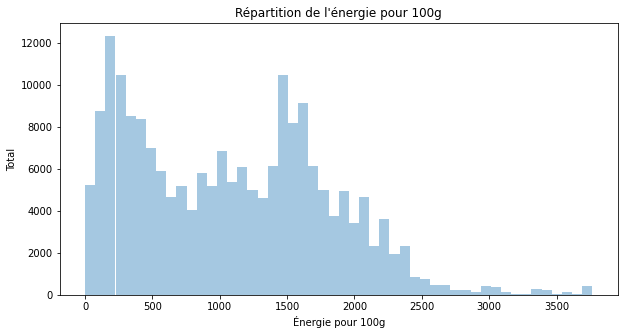

In [9]:
plt.figure(figsize=(10,5))
ax = sns.distplot(data["energy_100g"], kde=False)
ax.set(xlabel='Énergie pour 100g', ylabel='Total', title='Répartition de l\'énergie pour 100g')
plt.show()

In [10]:
data[(data["energy_100g"] == 0) & (data["brands"] == 'Carrefour') ] 

,code,product_name,brands,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
65509,0078742054100,Baking Powder,Carrefour,0.6 g (0.125 tsp),3.00000,[ ingredients -> en:ingredients ] [ cornsta...,0.00000,0.00000,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,27.51582,10.83300,10.00000,10.00000
79155,0613008724153,Sugar Free Iced Tea Stix,Carrefour,1.1 g (8 fl oz),3.00000,[ ingredients -> en:ingredients ] [ instant...,0.00000,0.00000,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",0.00000,0.00000,0.00000,90.91000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
91908,0732290006621,Ground Cumin,Carrefour,0.1 g (0.1 g),0.00000,[ ground-cumin -> en:ground-cumin ] [ cumin...,0.00000,0.00000,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,12.70000,5.00000,10.00000,10.00000
113706,0876941005431,Red & Green Pepper Strips,Carrefour,4 g (0.5 tsp),2.00000,[ red-and-green-pimentos -> en:red-and-green-...,0.00000,0.00000,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.27000,0.50000,5.00000,5.00000
116343,0896859000632,Organic Yellow Mustard,Carrefour,5 g (1 Tbsp),1.00000,[ ingredients -> en:ingredients ] [ water -...,0.00000,0.00000,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.04800,1.20000,10.00000,10.00000
145185,3270190116912,Eau de source de Montagne,Carrefour,1 l,0.00000,[ eau-de-source -> fr:eau-de-source ] [ eau...,0.00000,0.00000,b,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00069,0.00027,0.00000,0.00000
155485,3560070345724,Cola Zéro Carrefour,Carrefour,NaN,5.00000,[ eau-gazeifiee -> fr:eau-gazeifiee ] [ eau...,0.00000,0.00000,b,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.03810,0.01500,0.00000,0.00000
156306,3560070692484,Soda cola sans caféine,Carrefour,NaN,nan,NaN,nan,nan,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",0.00000,0.00000,0.01000,0.00000,0.01000,0.00000,0.01000,0.02000,0.00787,1.00000,0.00000
181267,7610211010304,Hermesetas : Mini Sweeteners : 1200 comprimés,Carrefour,0 g,0.00000,[ 1-comprime-contient-11-8mg-de-saccharine-so...,0.00000,0.00000,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,26.50000,10.43307,10.00000,10.00000


In [11]:
# un produit avec 0 énergie
data.iloc[155485]

code                                                                           3560070345724
product_name                                                             Cola Zéro Carrefour
brands                                                                             Carrefour
serving_size                                                                             NaN
additives_n                                                                          5.00000
additives                                   [ eau-gazeifiee -> fr:eau-gazeifiee  ]  [ eau...
ingredients_from_palm_oil_n                                                          0.00000
ingredients_that_may_be_from_palm_oil_n                                              0.00000
nutrition_grade_fr                                                                         b
states                                     en:to-be-checked, en:complete, en:nutrition-fa...
states_tags                                en:to-be-checked,en:complet

In [12]:
data[(data["energy_100g"] >= 3766) & (data["brands"] == 'Carrefour') ] 

,code,product_name,brands,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
145193,3270190118800,Huile De Tournesol Végétale 2 Litre,Carrefour,NaN,nan,NaN,nan,nan,e,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",3766.00000,0.00000,100.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,20.00000,20.00000
157046,3560070937837,Huile d'olive,Carrefour,NaN,nan,NaN,nan,nan,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",3766.00000,100.00000,15.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,11.00000,20.00000


In [13]:
# Un produit avec le maximum d'énergie
data.iloc[157046]

code                                                                           3560070937837
product_name                                                                   Huile d'olive
brands                                                                             Carrefour
serving_size                                                                             NaN
additives_n                                                                              NaN
additives                                                                                NaN
ingredients_from_palm_oil_n                                                              NaN
ingredients_that_may_be_from_palm_oil_n                                                  NaN
nutrition_grade_fr                                                                         d
states                                     en:to-be-completed, en:nutrition-facts-complet...
states_tags                                en:to-be-completed,en:nutri

## Nutri-score
Le nutri-score est un système d'étiquetage nutritionnel à cinq niveaux, allant de A à E et du vert au rouge, établi en fonction de la valeur nutritionnelle d'un produit alimentaire.(source: Wikipédia) 

In [14]:
data["nutrition_grade_fr"].describe()

count     196856
unique         5
top            d
freq       54350
Name: nutrition_grade_fr, dtype: object

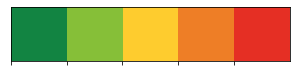

In [15]:
# Palette de couleur pour l'affichage
nutri_score_colors = ["#128442", "#86BF38", "#FECC2E", "#EE7E26", "#E52F24"]
nutri_score_palette = sns.set_palette(sns.color_palette(nutri_score_colors))
sns.palplot(sns.color_palette())

<Figure size 1440x720 with 0 Axes>

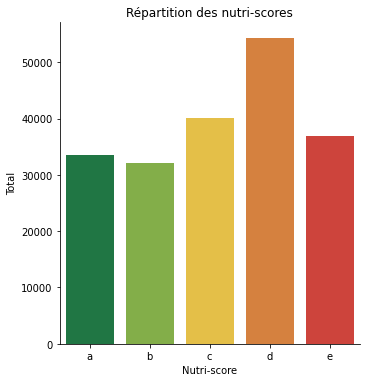

In [16]:
plt.figure(figsize=(20,10))
ax = sns.catplot(x="nutrition_grade_fr", kind="count", palette=nutri_score_palette, data=data,order="abcde")
ax.set(xlabel='Nutri-score', ylabel='Total', title='Répartition des nutri-scores')
plt.show()

## Nutriments
il y a 5 nutriments de base qui entrent dans le calcul de l'énergie d'un produit. 
On remarquera que certain produit ont 100% d'un nutriment comme certaines huiles d'olives avec 100% de Lipides ou comme les morceaux de sucre pour les glucides. 

In [17]:
base_nutrients = np.array(['fat_100g','carbohydrates_100g','fiber_100g', 'proteins_100g','salt_100g'])
df_selection = data.filter(regex='^(?!nutrition-score).*(_100g)$')
nutrients = df_selection.columns.to_list()
nutrients

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

### Matière grasse/Lipide

In [18]:
print("fat_100g")
print(data["fat_100g"].describe())

fat_100g
count   196856.00000
mean        10.62949
std         14.54519
min          0.00000
25%          0.00000
50%          4.00000
75%         17.00000
max        100.00000
Name: fat_100g, dtype: float64


In [19]:
data.iloc[22892]

code                                                                           0036800397392
product_name                                                          Extra Virgin Olive Oil
brands                                                                             Food Club
serving_size                                                                   14 g (1 Tbsp)
additives_n                                                                          0.00000
additives                                   [ extra-virgin-olive-oil -> en:extra-virgin-o...
ingredients_from_palm_oil_n                                                          0.00000
ingredients_that_may_be_from_palm_oil_n                                              0.00000
nutrition_grade_fr                                                                         e
states                                     en:to-be-completed, en:nutrition-facts-complet...
states_tags                                en:to-be-completed,en:nutri

### Glucide

In [20]:
print("carbohydrates_100g")
print(data["carbohydrates_100g"].describe())

carbohydrates_100g
count   196856.00000
mean        28.20451
std         28.08959
min          0.00000
25%          3.70000
50%         15.70000
75%         53.00000
max        100.00000
Name: carbohydrates_100g, dtype: float64


In [21]:
data.iloc[194843]

code                                                                           8715035110502
product_name                                                                      Sauce soja
brands                                                                              Kikkoman
serving_size                                                                             NaN
additives_n                                                                          0.00000
additives                                   [ eau -> fr:eau  ]  [ soja -> fr:soja  ]  [ b...
ingredients_from_palm_oil_n                                                          0.00000
ingredients_that_may_be_from_palm_oil_n                                              0.00000
nutrition_grade_fr                                                                         c
states                                     en:to-be-completed, en:nutrition-facts-complet...
states_tags                                en:to-be-completed,en:nutri

### Fibre

In [22]:
print("fiber_100g")
print(data["fiber_100g"].describe())

fiber_100g
count   196856.00000
mean         1.82919
std          3.14199
min          0.00000
25%          0.00000
50%          0.60000
75%          2.70000
max        100.00000
Name: fiber_100g, dtype: float64


### Proteines

In [23]:
print("proteins_100g")
print(data["proteins_100g"].describe())

proteins_100g
count   196856.00000
mean         7.33746
std          7.84066
min          0.00000
25%          1.60000
50%          5.00000
75%         10.26000
max         94.70000
Name: proteins_100g, dtype: float64


In [24]:
print("salt_100g")
print(data["salt_100g"].describe())

salt_100g
count   196856.00000
mean         1.23051
std          3.91696
min          0.00000
25%          0.10000
50%          0.64770
75%          1.37414
max        100.00000
Name: salt_100g, dtype: float64


# Exploration des données (2/4)
Recherche des corrélations entre les variables.

Plusieurs corrélations sont interressantes comme celle entre l'énergie (energy_100g) et les lipides (fat_100g) qui est de 0.73. 
Ce qui tend à dire que la pluspart des produits énergétiques contiennent beaucoup de sucre. Il y a aussi la relation entre les lipides (fat_100g)
et les graisses saturées (saturated-fat_100g) qui est de 0.75. les graisses saturées faisant partie de la grande famille de lipide cette 
corrélation est normale. La corrélation entre le sodium (sodium_100g) et le sel (salt_100g) est de 1, car il y a une relation linéaire entre le sel 
et le sodium. 1g de sel correspond à 400mg de sodium et 600mg de chlore.   

Il y aussi une corrélation négative entre le sucre (sugar_100g) et les proteines (protein_100g) de -0,28, ce qui tend à dire que plus il y a de proteines 
moins il y a de scure et vice-versa. 


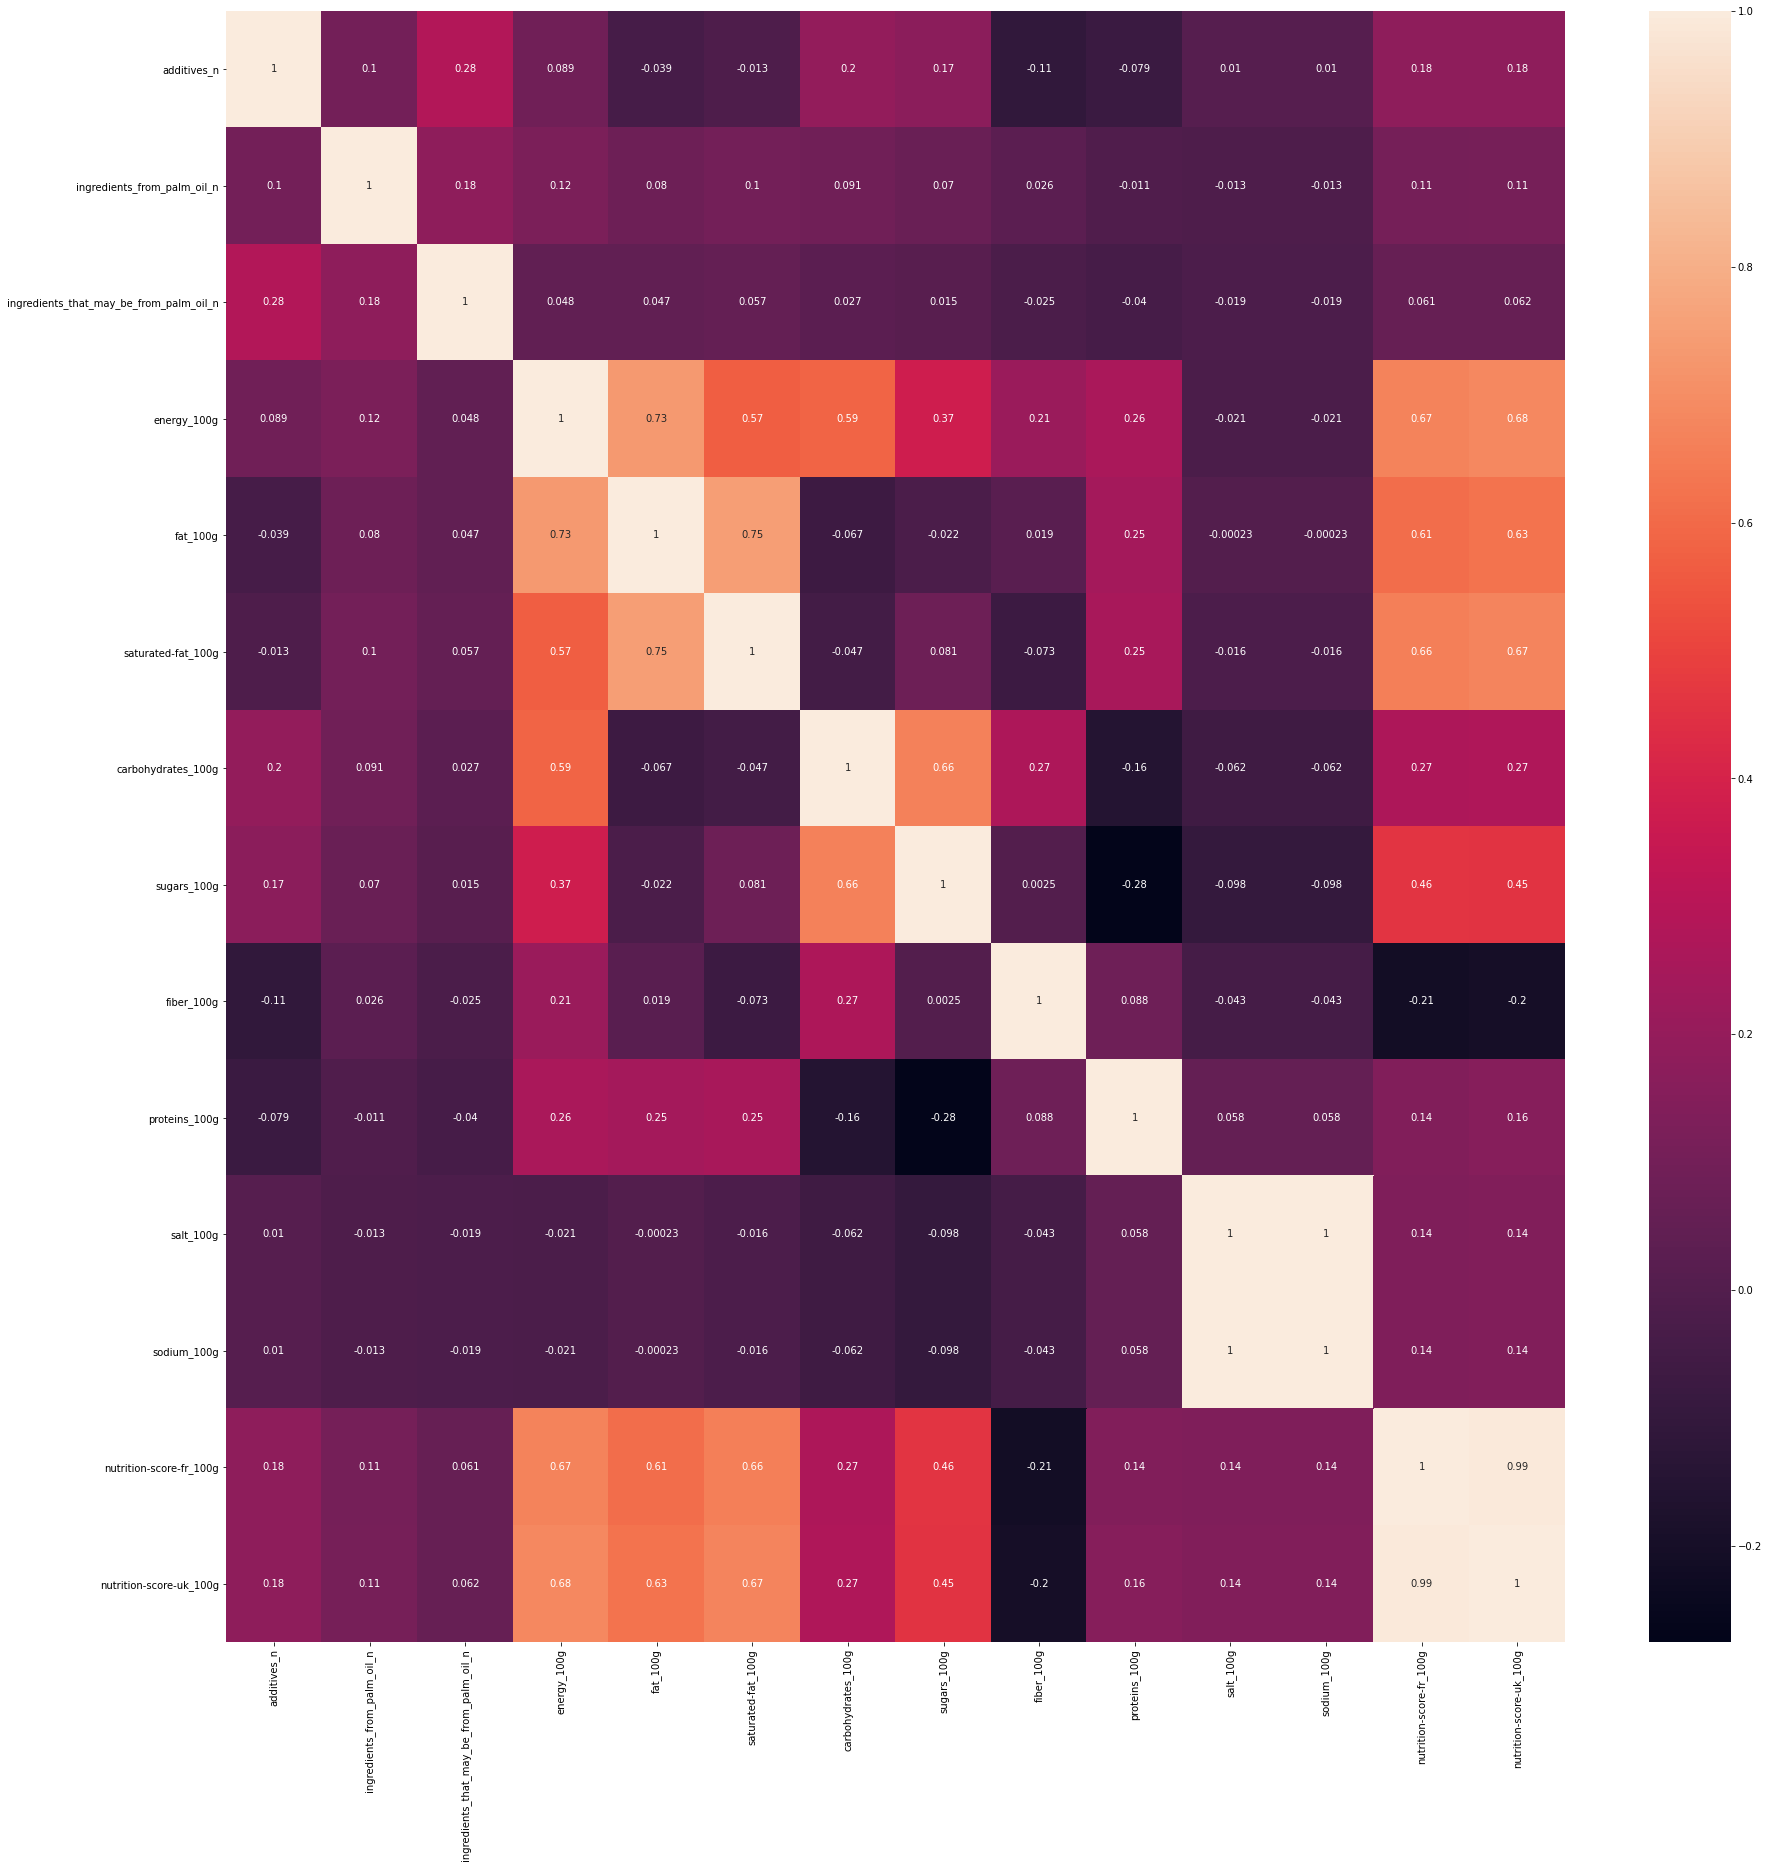

In [25]:
data_corr = data.dropna().corr()
plt.figure(figsize=(30,30))
sns.heatmap(data_corr,annot=True)
plt.show()

### Énergie et lipides

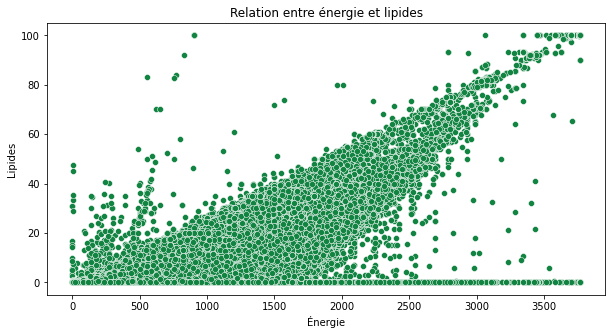

In [26]:
# énergie et lipides
plt.figure(figsize=(10,5))
ax = sns.scatterplot(data=data, x="energy_100g", y="fat_100g")
ax.set(xlabel='Énergie', ylabel='Lipides', title='Relation entre énergie et lipides')
plt.show()

### Sel et sodium

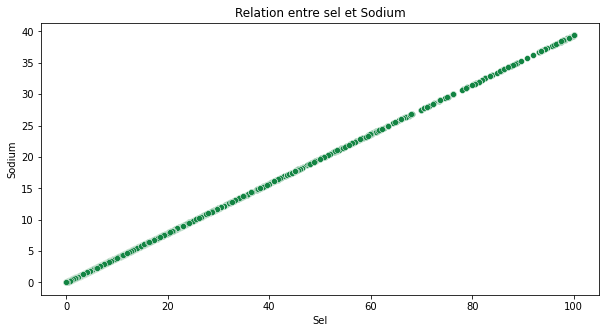

In [27]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(data=data, x="salt_100g", y="sodium_100g")
ax.set(xlabel='Sel', ylabel='Sodium', title='Relation entre sel et Sodium')
plt.show()

### Énergie et Nutri-score
Corrélation entre énergie et le score de nutrition est de 0,67. 
On remarque que pour les extrèmes des énergies elles se situent entre un nutri-score de C et de D 

In [28]:
### Le tableau de nutri-score est découpé en 5 variables pour pouvoir le comparer avec d'autres variables  

In [29]:
data.groupby(['energy_100g', 'nutrition_grade_fr']).size()

energy_100g  nutrition_grade_fr
0.00000      a                      66
             b                     325
             c                     784
             d                      28
             e                       8
                                  ... 
3761.00000   e                       8
3762.00000   e                       1
3766.00000   c                       7
             d                      49
             e                     100
Length: 10948, dtype: int64

/opt/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='nutrition_grade_fr,energy_100g'>

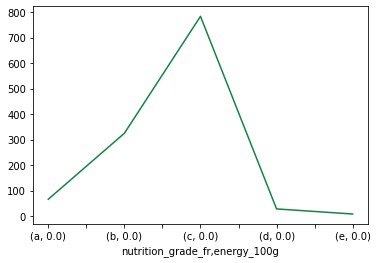

In [30]:
df = data[data['energy_100g'] == 0]
df.groupby(['nutrition_grade_fr', 'energy_100g' ]).size().plot()

/opt/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='nutrition_grade_fr,energy_100g'>

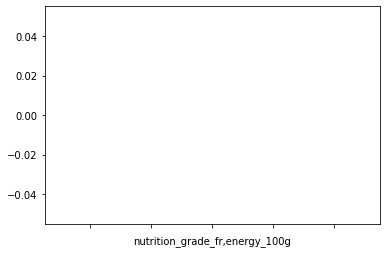

In [31]:
df = data[data['energy_100g'] == 3768]
df.groupby(['nutrition_grade_fr', 'energy_100g']).size().plot()

### Nutri-score et nutriments
Pour qu'un produit soit considéré comme plus favorable sur le plan nutritionnel (classé A), il faut qu'il ait en moyenne :
 - 2% de lipides, 
 - 25% de glucides, 
 - 4% de fibre, 
 - 8% de protéines, 
 - 0,3% de sel

alors qu'un produit sera considéré comme moins favorable sur le plan nutritionnel (classé E) si en moyenne il contient :
 - 24% de lipides, 
 - 33% de glucides, 
 - 1% de fibre, 
 - 9% de protéines, 
 - 1% de sel

Il vaux mieux privilégier les produits riches en fibre et en glucide et pauvre en lipide. Comme par exemple les haricots de Lima de la société Birds Eye, 
en revanche il faut éviter les produits comme les noix de cajou de la société Pardoe's Perky Peanuts.

In [32]:
base_nutrients = np.array(['fat_100g','carbohydrates_100g','fiber_100g', 'proteins_100g','salt_100g'])
nutrition_grade = data.groupby('nutrition_grade_fr', as_index=False)[base_nutrients].mean()
display(nutrition_grade)

,nutrition_grade_fr,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g
0,a,2.22362,24.66098,3.51823,7.79399,0.33870
1,b,2.83053,15.25446,1.26928,4.83810,0.53383
2,c,7.02456,25.95511,2.19825,6.21701,1.71911
3,d,13.96971,36.20908,1.46739,8.00013,1.62931
4,e,24.03235,33.32221,0.91314,9.33263,1.52868


<AxesSubplot:title={'center':'Répartition du nutri-score par nutriment'}>

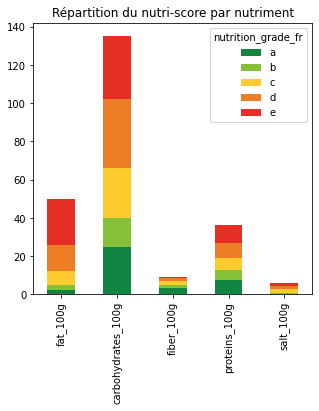

In [33]:

nutrition_grade.set_index('nutrition_grade_fr').T.plot(
    kind='bar', 
    stacked=True, 
    figsize=(5,5), 
    title="Répartition du nutri-score par nutriment"
    
    )


### Liste des produits à priviléger

In [34]:
grade_A = data[
    (data['fat_100g'] < 2.8) &
    (data['carbohydrates_100g'] >= 15.2) & (data['carbohydrates_100g'] < 25.9) &
    (data['fiber_100g'] >= 2.1) &
    (data['proteins_100g'] >= 6.2) & (data['proteins_100g'] < 7.9) &
    (data['salt_100g'] < 0.5)
]
print(f"Il y a {grade_A.shape[0]} produits qui ont le meilleur compromis au niveau nutritionel")
display(grade_A.head())

Il y a 62 produits qui ont le meilleur compromis au niveau nutritionel


,code,product_name,brands,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2805,0011110897329,Southern Style Baby Lima Beans,Kroger,83 g (0.5 cup),0.00000,[ baby-lima-beans -> en:baby-lima-beans ] [...,0.00000,0.00000,a,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",556.00000,0.00000,0.00000,24.10000,2.41000,6.00000,7.23000,0.03048,0.01200,-8.00000,-8.00000
2806,0011110897336,Southern Style Fordhook Lima Beans,Kroger,88 g (0.5 cup),0.00000,[ fordook-lima-beans -> en:fordook-lima-beans...,0.00000,0.00000,a,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",477.00000,0.00000,0.00000,20.45000,3.41000,4.50000,6.82000,0.01524,0.00600,-8.00000,-8.00000
4939,0011213037790,Fudge Pops,Spartan,46 g (46 g),5.00000,[ nonfat-milk -> en:nonfat-milk ] [ milk ->...,0.00000,0.00000,a,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",410.00000,0.00000,0.00000,21.74000,8.70000,2.20000,6.52000,0.19304,0.07600,-5.00000,-5.00000
7339,0014500001962,Fordhook Lima Beans,Birds Eye,88 g (0.5 cup),0.00000,[ fordhook-lima-beans -> en:fordhook-lima-bea...,0.00000,0.00000,a,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",477.00000,0.00000,0.00000,20.45000,3.41000,4.50000,6.82000,0.01524,0.00600,-8.00000,-8.00000
16375,0028800293118,Premium Baby Lima Beans,Hanover,85 g (0.5 cup),0.00000,[ baby-lima-beans-and-salt -> en:baby-lima-be...,0.00000,0.00000,a,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",494.00000,0.00000,0.00000,23.53000,2.35000,9.40000,7.06000,0.23876,0.09400,-7.00000,-7.00000


### Liste des produits à éviter

In [35]:
grade_E = data[
    (data['fat_100g'] > 14) &
    (data['carbohydrates_100g'] > 26) & (data['carbohydrates_100g'] < 36.2) &
    (data['fiber_100g'] < 1.2) &
    (data['proteins_100g'] > 8) &
    (data['salt_100g'] > 0.5) & (data['salt_100g'] < 1.6)
]
print(f"Il y a {grade_E.shape[0]} produits qui ont le moins bon compromis au niveau nutritionel")
display(grade_E.head())

Il y a 87 produits qui ont le moins bon compromis au niveau nutritionel


,code,product_name,brands,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2404,0011110864543,Peppered Bacon Pizza With Roasted Garlic Sauce,Kroger,134 g (134 g),7.00000,[ crust -> en:crust ] [ wheat-flour -> en:w...,0.00000,0.00000,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1280.00000,16.42000,6.72000,29.85000,2.24000,0.70000,11.19000,1.57226,0.61900,15.00000,15.00000
2502,0011110870261,Selects Chicken & Cheese Cornbread Sandwiches,Kroger,133 g (133 g),10.00000,[ corn-bread -> en:corn-bread ] [ bread -> ...,0.00000,0.00000,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1197.00000,14.29000,3.01000,26.32000,8.27000,0.00000,10.53000,1.47066,0.57900,13.00000,13.00000
7237,0014113911672,Pistachios,Wonderful,NaN,0.00000,[ pistaches -> fr:pistaches ] [ sel -> fr:s...,0.00000,0.00000,c,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",2469.00000,46.00000,5.60000,27.70000,7.80000,0.00000,21.40000,1.30000,0.51181,8.00000,8.00000
10594,0020633000901,"Pardoe's, Deluxe Cashews",Pardoe's Perky Peanuts Inc.,28 g (1 oz),0.00000,[ cashews -> en:cashews ] [ peanut-oil -> e...,0.00000,0.00000,e,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2540.00000,50.00000,10.71000,28.57000,7.14000,0.00000,17.86000,1.08966,0.42900,22.00000,22.00000
23039,0036800415430,"@ Ease, Cheeseburger Sandwich",Topco Associates Inc.,133 g (1 SANDWICH),2.00000,[ sesame-bun -> en:sesame-bun ] [ bun -> en...,0.00000,0.00000,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1289.00000,16.54000,5.26000,28.57000,5.26000,0.80000,12.78000,1.41224,0.55600,14.00000,14.00000


### Marques et Nutri-score
Carrefour étant la marque qui propose les plus de produits il n'est normal que la gamme des nutri-score s'étende de "A" à "E". 
Il est interressant de rechercher les marques qui ont le plus de produits avec un nutri-score à "A" et celles ayant le plus de prodiots avec un nutri-score à "E".
Dans la recherche on exclura les marques qui ont 100% de produits dans un score ou l'autre.

Les produits de la marque Tillamook on un nutri-score très élevé qui s'explique par le fait que cette marque vend principalement des glaces, 
en revanche la marque Mann's propose de nombreux produits avec un nutri-score de "A" et qui sexplique par le fait que cette marque vende principament des légumes

In [36]:
# Classement des sociétés ayant le plus grand nombre de produits classés A
df = data[data['nutrition_grade_fr'] == 'a']
df.groupby(['brands']).size().sort_values(ascending=False)

brands
Carrefour                      835
Auchan                         367
U                              312
Meijer                         271
Leader Price                   270
                              ... 
Moisan                           1
Moja cena                        1
Molino Di Borgo S. Dalmazzo      1
Molino Pasini S.P.A.             1
 Core Meal, Core Method          1
Length: 8359, dtype: int64

In [37]:
# Classement des société ayant le plus grand nombre de produits classés E
df = data[data['nutrition_grade_fr'] == 'e']
df.groupby(['brands']).size().sort_values(ascending=False)

brands
Carrefour                                       861
Auchan                                          346
Lindt                                           306
U                                               270
Leader Price                                    242
                                               ... 
Migros M-Budget                                   1
Migros Selection                                  1
Migros, Créa d'Or                                 1
Migros,Afiro                                      1
 Field Roast, The Field Roast Grain Meat Co.      1
Length: 10521, dtype: int64

In [38]:
def get_best_score(score, brands):
    brand_name = ''
    brand_precent = 0
    brand_count = 0
    brand_total = 0
    
    for index in score.index:
        percent = (score[index] / brands[index]) * 100
        
        # exclude 100%
        if score[index] == brands[index]:
            continue
        if percent > brand_precent:           
            brand_precent = percent
            brand_name = index
            brand_count = score[index]
            brand_total = brands[index]
            
    return (brand_name, brand_precent, brand_count, brand_total)

In [39]:
# Recherche des marques ayant le plus de produits de classe A et des marques ayant le plus de produits de classe E
brands = data.groupby(['brands']).size()

score = data[data['nutrition_grade_fr'] == 'e']
bad_score = score.groupby(['brands']).size()
(name, precent, count, total) = get_best_score(bad_score, brands)
print(f"La marque {name} à {precent:.2f}% de produits avec un mutri-score de E")
print(f"C'est à dire {count}/{total} produits")
print()

score = data[data['nutrition_grade_fr'] == 'a']
good_score = score.groupby(['brands']).size()
(name, precent, count, total) = get_best_score(good_score, brands)
print(f"La marque {name} à {precent:.2f}% de produits avec un mutri-score de A")
print(f"C'est à dire {count}/{total} produits")


La marque Tillamook,  Tillamook County Creamery Association à 97.83% de produits avec un mutri-score de E
C'est à dire 45/46 produits

La marque Mann's à 96.00% de produits avec un mutri-score de A
C'est à dire 24/25 produits


# Exploration des données (3/4)
Analyse en Composantes Principales

In [40]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        

In [41]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None, illustrative_legend=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(10,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des aliments (coloration : "+illustrative_legend+") (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)


In [42]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [43]:
# Transformation du nutri-score en variable numérique a -> 1, b -> 2, ... e -> 5
#data['nutrition_grade_fr_n'] = data['nutrition_grade_fr'].map({'a': 1, 'b': 2, 'c': 3, 'd': 4 ,'e': 5})
#


In [44]:
data.head()

,code,product_name,brands,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000016872,Zen Party Mix,Sunridge,30 g (0.25 cup),1.00000,[ roasted-peanuts -> en:roasted-peanuts ] [...,0.00000,0.00000,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2230.00000,36.67000,5.00000,36.67000,3.33000,6.70000,16.67000,1.60782,0.63300,12.00000,12.00000
1,0000000018227,Organic Oat Groats,Pcc,42 g (0.25 cup),0.00000,[ organic-oat-groats -> en:organic-oat-groats...,0.00000,0.00000,a,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1096.00000,5.95000,1.19000,66.67000,2.38000,9.50000,16.67000,0.02540,0.01000,-6.00000,-6.00000
2,0000000018265,Energy Power Mix,Sunridge,40 g (0.25 cup),0.00000,[ yogurt-raisins -> en:yogurt-raisins ] [ r...,0.00000,0.00000,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1464.00000,17.50000,7.50000,42.50000,32.50000,5.00000,7.50000,0.28448,0.11200,14.00000,14.00000
3,0000000018340,Fire Roasted Hatch Green Chile Almonds,Sunridge,30 g (0.25 cup),2.00000,[ dry-roasted-almonds -> en:dry-roasted-almon...,0.00000,0.00000,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2372.00000,50.00000,3.33000,23.33000,6.67000,10.00000,6.67000,1.27000,0.50000,11.00000,11.00000
4,0000000018357,Peanut Butter Power Chews,Sunridge,45 g (45 GRM),3.00000,[ peanut-butter -> en:peanut-butter ] [ but...,0.00000,0.00000,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1954.00000,20.00000,2.22000,60.00000,33.33000,4.40000,8.89000,0.19812,0.07800,9.00000,9.00000


In [45]:
# Remplacement des valeurs manquantes dans "additives_n" par 0
data['additives_n'] = data['additives_n'].fillna(value=0)

In [46]:
# PCA 
# On transforme la variable nutrition_grade_fr en valeurs numériques
data['nutrition_grade_fr_n'] = data['nutrition_grade_fr'].map({'a': 1, 'b': 2, 'c': 3, 'd': 4 ,'e': 5})
data_pca = data[['nutrition_grade_fr_n',
                 'fat_100g', 
                 'carbohydrates_100g',             
                 'fiber_100g', 
                 'proteins_100g', 
                'salt_100g', 
                ]]

In [47]:
features = data_pca.columns
n_components = data_pca.shape[1]
data_pca.head()

,nutrition_grade_fr_n,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g
0,4,36.67000,36.67000,6.70000,16.67000,1.60782
1,1,5.95000,66.67000,9.50000,16.67000,0.02540
2,4,17.50000,42.50000,5.00000,7.50000,0.28448
3,4,50.00000,23.33000,10.00000,6.67000,1.27000
4,3,20.00000,60.00000,4.40000,8.89000,0.19812


In [48]:
# Transformation : Centrage et réduction
X = StandardScaler().fit_transform(data_pca.values)

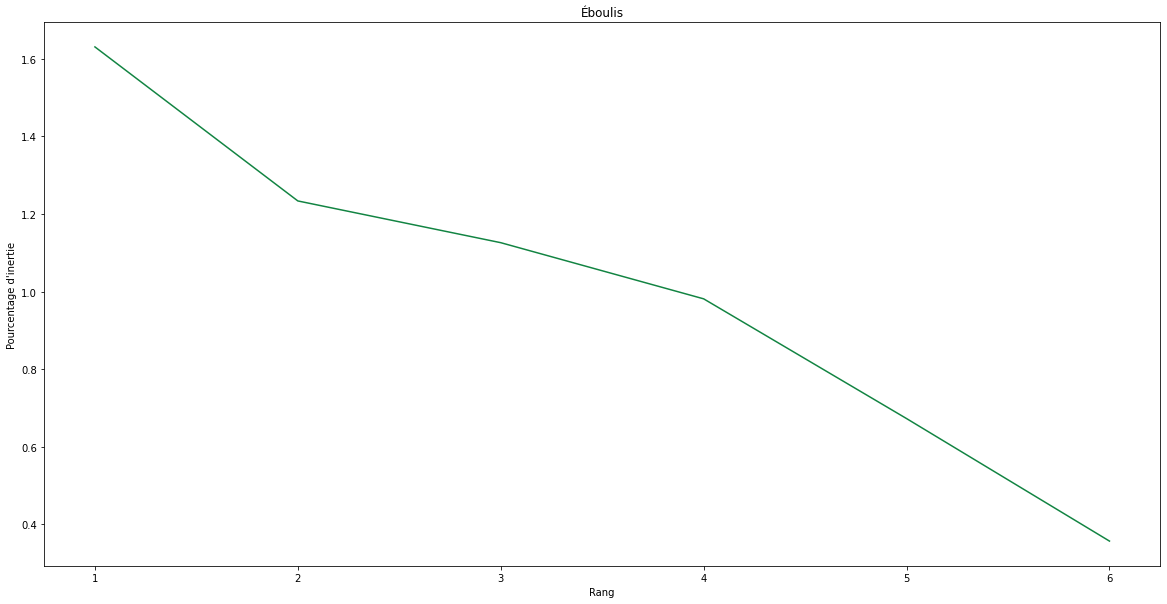

In [49]:
# Calcul des composantes principales
pca = PCA(n_components=n_components)
pca.fit_transform(X)

plt.figure(figsize=(20,10))
plt.plot(np.arange(1, n_components + 1), pca.explained_variance_ )
plt.title("Éboulis")
plt.ylabel("Pourcentage d'inertie")
plt.xlabel("Rang")
plt.show()

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


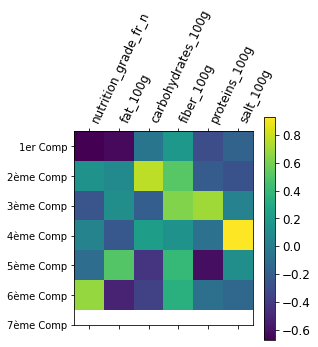

In [50]:
# Matrice de d'importance des variables pour chaque composante de la PCA
#plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size': 12})
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4,5,6],['1er Comp','2ème Comp','3ème Comp','4ème Comp','5ème Comp','6ème Comp','7ème Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(data_pca.columns)),data_pca.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()

In [51]:
# Proportion des variances
print(pca.explained_variance_ratio_)

[0.27180086 0.20559395 0.18765182 0.16351599 0.11205032 0.05938706]


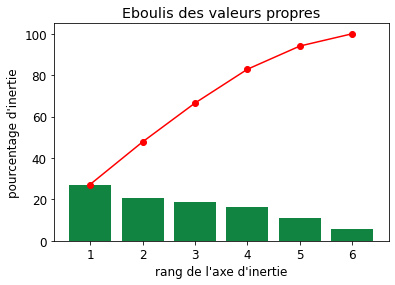

In [52]:
# Schéma des éboulis
display_scree_plot(pca)

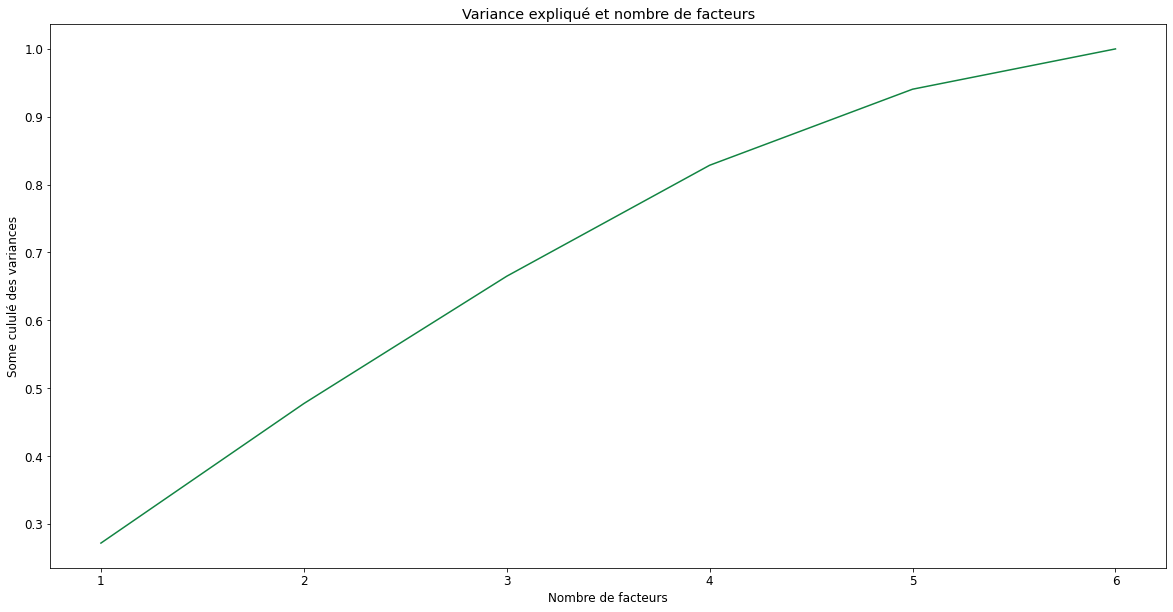

In [53]:
# Cumul des variances
plt.figure(figsize=(20,10))
plt.plot(np.arange(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_ ))
plt.title("Variance expliqué et nombre de facteurs")
plt.ylabel("Some cululé des variances")
plt.xlabel("Nombre de facteurs")
plt.show()

### Calcul des composantes principales

In [54]:
from sklearn import decomposition
pca_comp = decomposition.PCA(n_components=n_components)
pca_comp.fit(X)

PCA(n_components=6)

### Cercle des corrélations

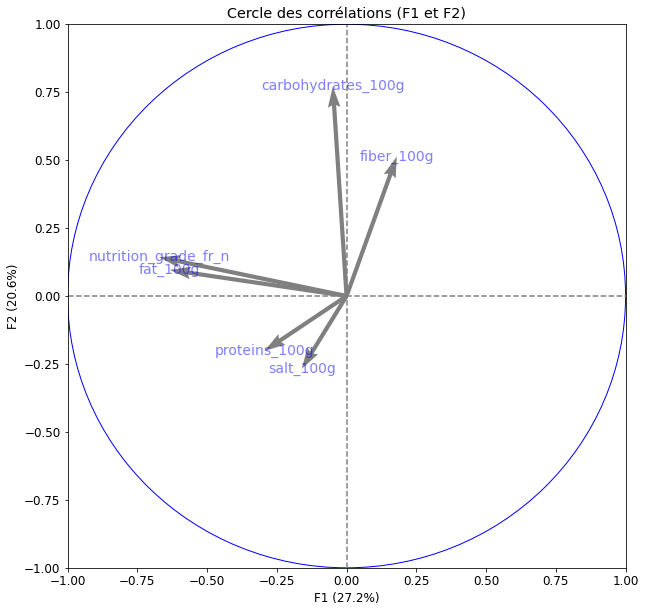

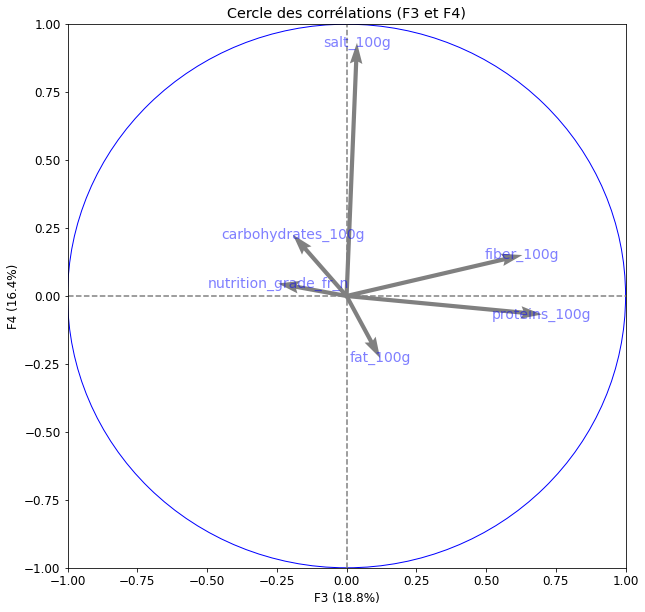

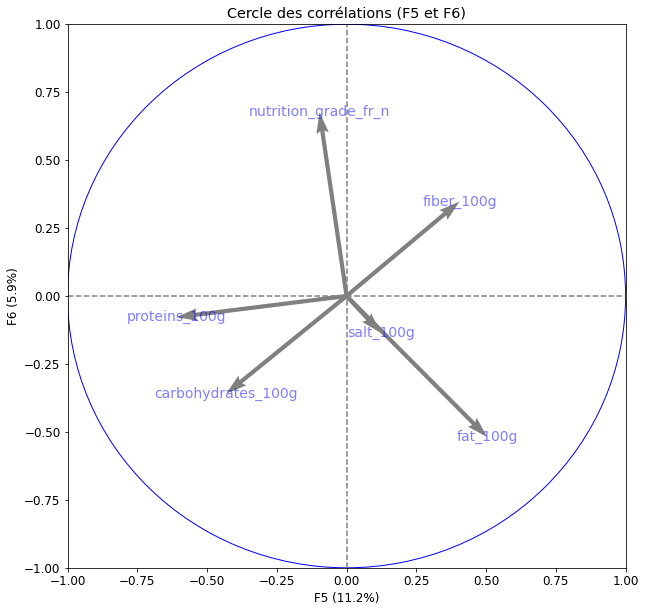

In [55]:
display_circles(pca.components_, n_components, pca_comp, [(0,1),(2,3),(4,5)], labels = np.array(features))

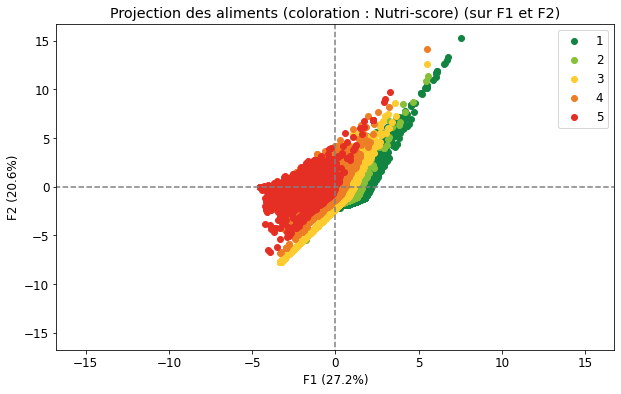

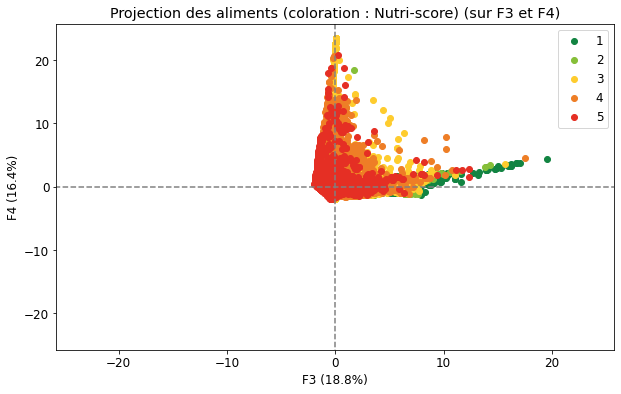

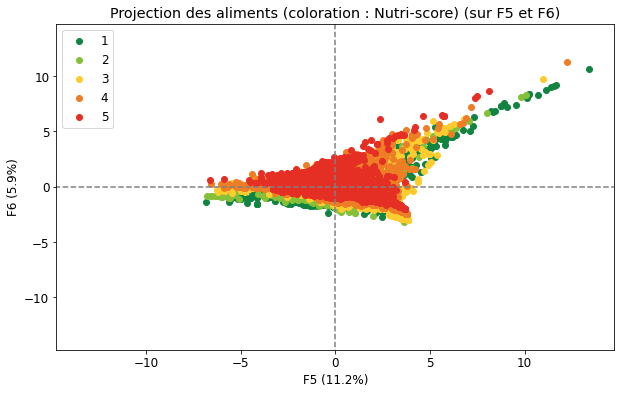

In [56]:
X_projected = pca.transform(X)
display_factorial_planes(X_projected, 
    pca.n_components_, 
    pca_comp,
    [(0,1),(2,3),(4,5)], 
    illustrative_var=data_pca[['nutrition_grade_fr_n']].values[:,0], 
    illustrative_legend='Nutri-score'
    )

## Exploration des données (4/4)

Hypothèses

Le Nutri-score permet au consommateur de mieux manger et de maîtriser son alimentation. 
Mais l'absence de signalétique quel sont les aliments qu'il faut privilégier ?

Dans les analyses précédente on a remarqué que :

  1. les produits à forte teneur en lipides (fat_100g) ont un mauvais nutri-score
  2. les produits pauvres en fibres ont tendance à avoir un bon nutri-score
  3. les glucides n'entrent pas en ligne de compte pour le nutri-score


Formulation des hypothèses

  1. $H_0$ La masse en lipides pour 100g est EGALE pour les produits ayant un bon nutriscore et ceux ayant un mauvais nutriscore.     
  2. $H_0$ La masse en fibres pour 100g est EGALE pour les produits ayant un bon nutriscore et ceux ayant un mauvais nutriscore.
  3. $H_0$ La masse en glucide pour 100g est EGALE pour les produits ayant un bon nutriscore et ceux ayant un mauvais nutriscore.

L'ensemble des trois impothèses $H_0$ ayant été rejetée, on peut supposer que plus le taux de lipides, de fibre ou de glucide 
est bas plus le nutri-score sera proche de "A"


In [57]:
def test_H0(grade_A, grade_E):
    """
    Test de l'hypothèce H0 avec une ANOVA qui teste si les deux groupes ont une moyenne équivalente
    Le test est fait par lot de 256 observations
    """
    # Niveau d'acceptation
    alpha = 0.5
    
    # Taille de lots d'observations
    lot_size = 256

    # Nombre de rejet de H0
    reject_H0 = 0

    # Nombre d'observations à traiter
    grade_A_len = grade_A.shape[0]
    grade_E_len = grade_E.shape[0]
    max_data = grade_A_len
    if grade_E_len < grade_A_len:
        max_data = grade_E_len
    

    # Découpage en lots
    nb_iter = int(max_data / lot_size)
    print(f"{max_data} observations à traiter en {nb_iter} lots")
    for i in range(0, nb_iter):
        g_A = grade_A[i*lot_size:(i + 1)*lot_size] 
        g_E = grade_E[i*lot_size:(i + 1)*lot_size]     
        p_value = f_oneway(g_A, g_E).pvalue
        if p_value <= alpha:
            reject_H0 += 1 
    return reject_H0 / nb_iter

In [58]:
# Data Frame pour ANOVA
df = data[['nutrition_grade_fr',
               'additives_n',                                  
               'energy_100g', 
               'fat_100g', 
               'saturated-fat_100g', 
               'carbohydrates_100g', 
               'sugars_100g', 
               'fiber_100g', 
               'proteins_100g', 
               'salt_100g', 
               'sodium_100g'                 
               ]]

### La masse en lipides pour 100g est EGALE pour les produits ayant un bon nutriscore et ceux ayant un mauvais nutriscore. 
Dans 100% des cas l'hypothèse $H_0$ a été rejetée, on peut dire que la masse de lipides pour 100 joue un rôle dans le nutri-score

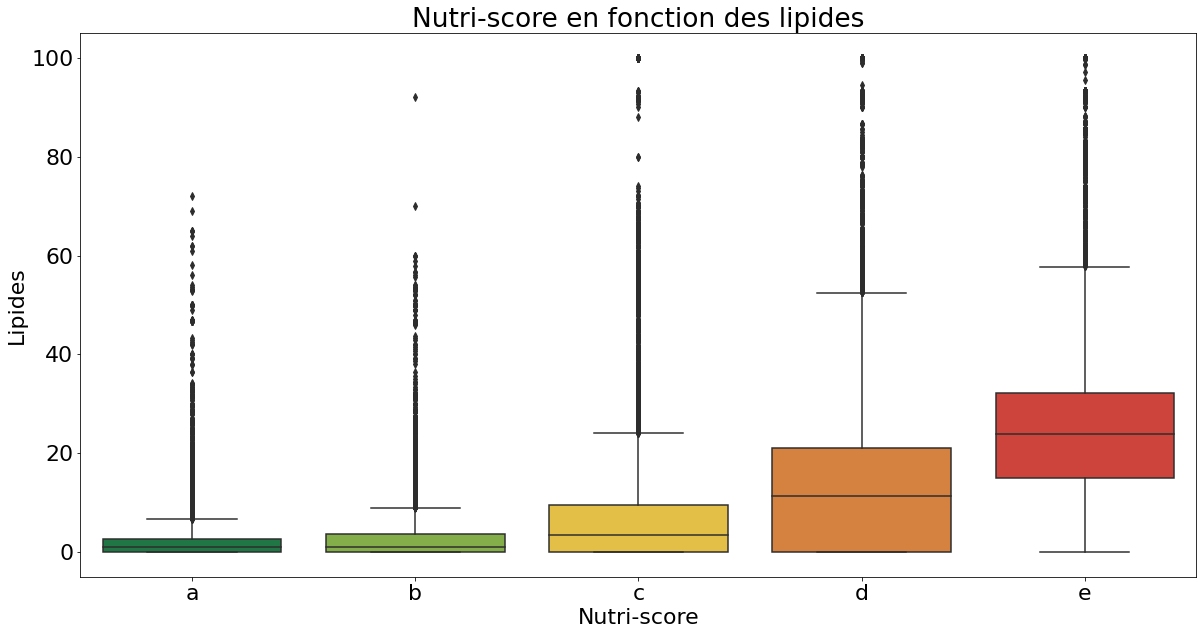

In [59]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
ax = sns.boxplot(x="nutrition_grade_fr", y="fat_100g", data=data, order=["a", "b", "c", "d", "e"])
ax.set(xlabel='Nutri-score', ylabel='Lipides', title='Nutri-score en fonction des lipides')
plt.show()

In [60]:
grade_A = df.loc[df['nutrition_grade_fr'] == 'a', 'fat_100g'] 
grade_E = df.loc[df['nutrition_grade_fr'] == 'e', 'fat_100g']
H0 = test_H0(grade_A, grade_E)
print(f"{H0 * 100:.2f}% de rejet de H0")

33533 observations à traiter en 130 lots
100.00% de rejet de H0


### La masse en fibres pour 100g est EGALE pour les produits ayant un bon nutriscore et ceux ayant un mauvais nutriscore. 
Dans 100% des cas l'hypothèse $H_0$ a été rejetée, on peut dire que la masse de fibre pour 100g joue un rôle dans le nutri-score

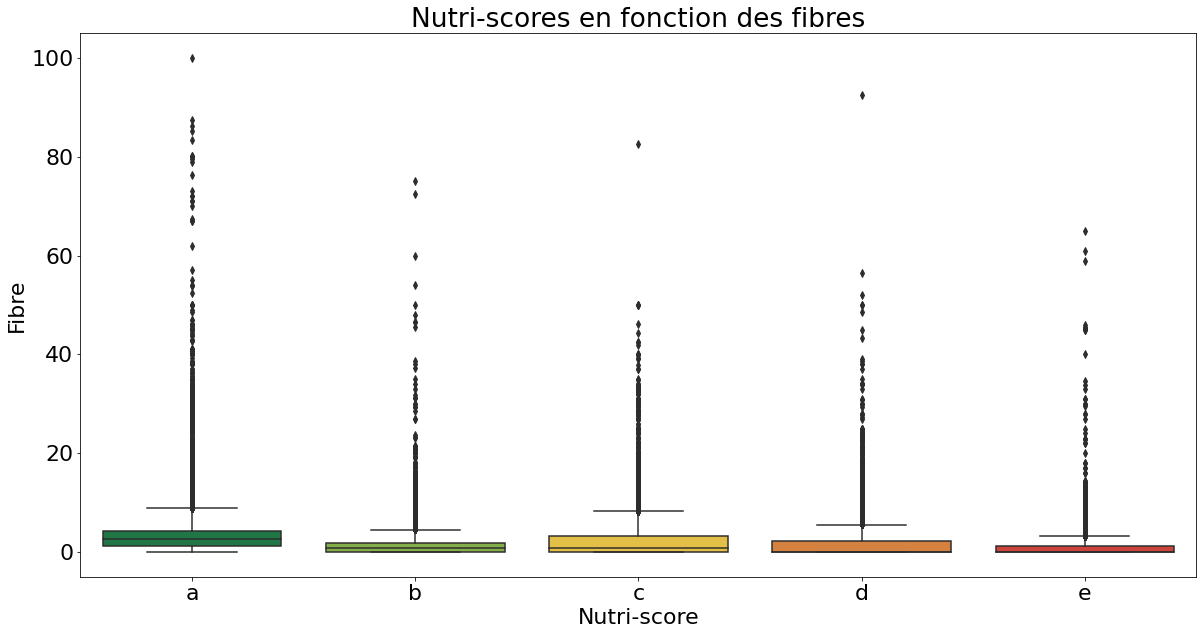

In [61]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
ax = sns.boxplot(x="nutrition_grade_fr", y="fiber_100g", data=data, order=["a", "b", "c", "d", "e"])
ax.set(xlabel='Nutri-score', ylabel='Fibre', title='Nutri-scores en fonction des fibres')
plt.show()

In [62]:
grade_A = df.loc[df['nutrition_grade_fr'] == 'a', 'fiber_100g'] 
grade_E = df.loc[df['nutrition_grade_fr'] == 'e', 'fiber_100g']
H0 = test_H0(grade_A, grade_E)
print(f"{H0 * 100:.2f}% de rejet de H0")

33533 observations à traiter en 130 lots
100.00% de rejet de H0


### La masse en glucides pour 100g est EGALE pour les produits ayant un bon nutriscore et ceux ayant un mauvais nutriscore. 
Dans 92% des cas l'hypothèse $H_0$ a été rejetée, on peut dire que la masse de lipides pour 100g joue un rôle dans le nutri-score

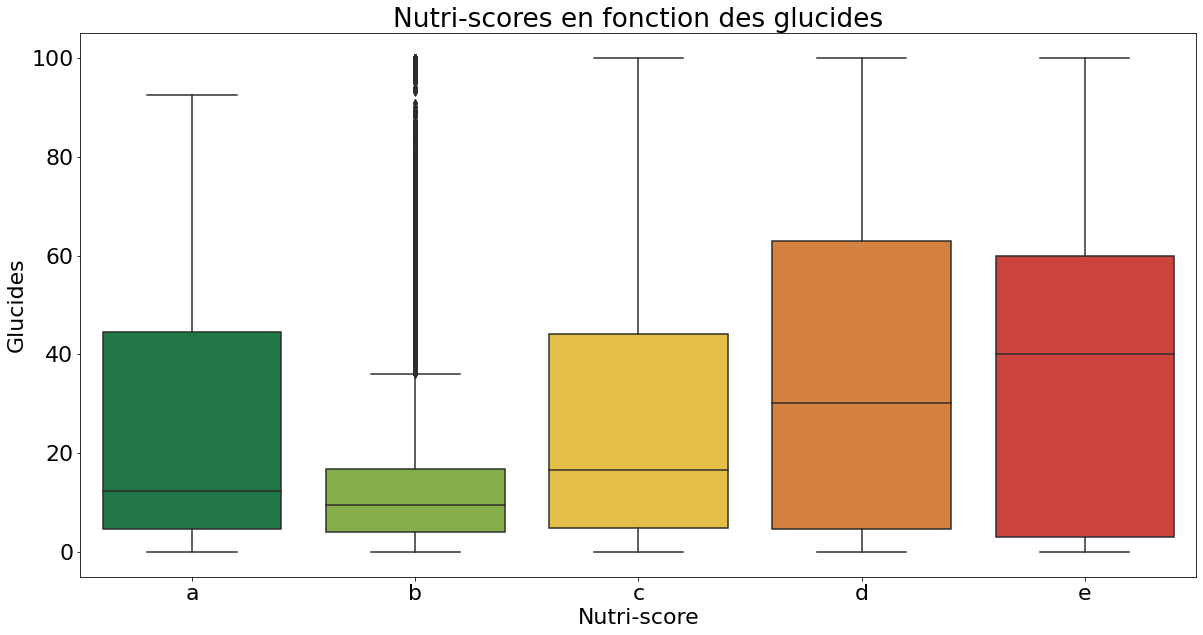

In [63]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
ax = sns.boxplot(x="nutrition_grade_fr", y="carbohydrates_100g", data=data, order=["a", "b", "c", "d", "e"])
ax.set(xlabel='Nutri-score', ylabel='Glucides', title='Nutri-scores en fonction des glucides')
plt.show()

In [64]:
grade_A = df.loc[df['nutrition_grade_fr'] == 'a', 'carbohydrates_100g'] 
grade_E = df.loc[df['nutrition_grade_fr'] == 'e', 'carbohydrates_100g']
H0 = test_H0(grade_A, grade_E)
print(f"{H0 * 100:.2f}% de rejet de H0")

33533 observations à traiter en 130 lots
92.31% de rejet de H0


### La masse en lipides pour 100g est EGALE pour les produits ayant un bon nutriscore et ceux ayant un mauvais nutriscore. 
Dans 100% des cas l'hypothèse $H_0$ a été rejetée, on peut dire que la masse de lipides pour 100g joue un rôle dans le nutri-score

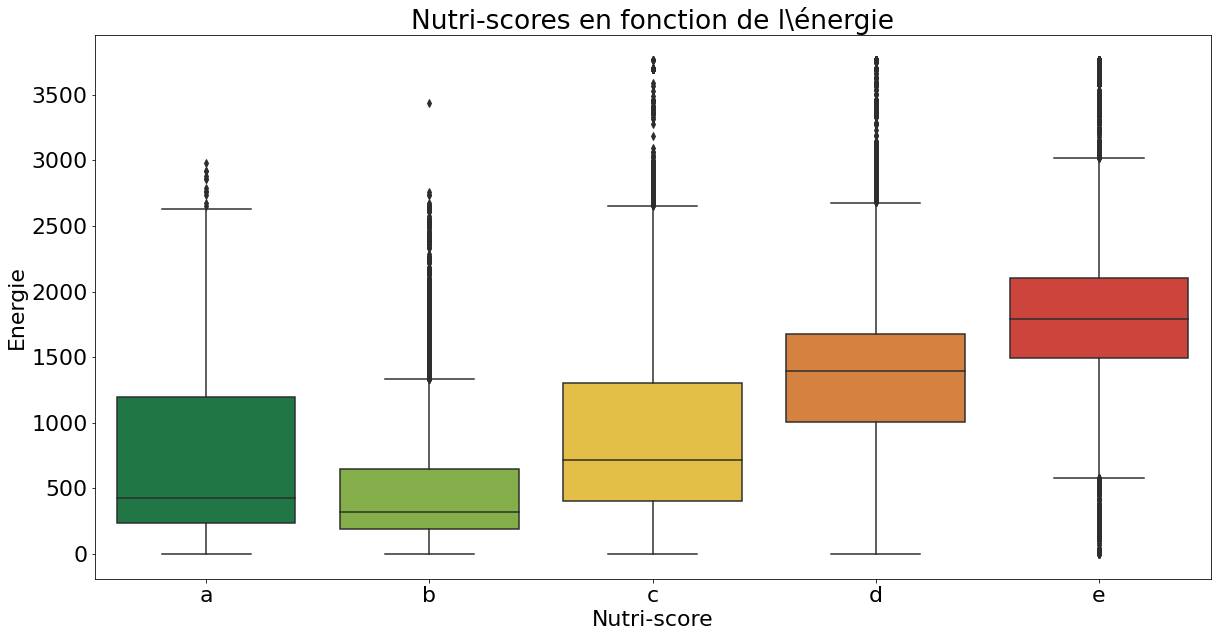

In [65]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
ax = sns.boxplot(x="nutrition_grade_fr", y="energy_100g", data=data, order=["a", "b", "c", "d", "e"])
ax.set(xlabel='Nutri-score', ylabel='Energie', title='Nutri-scores en fonction de l\énergie')
plt.show()


In [66]:
grade_A = df.loc[df['nutrition_grade_fr'] == 'a', 'energy_100g'] 
grade_E = df.loc[df['nutrition_grade_fr'] == 'e', 'energy_100g']
H0 = test_H0(grade_A, grade_E)
print(f"{H0 * 100}% de rejet de H0")

33533 observations à traiter en 130 lots
100.0% de rejet de H0
